In [1]:
import sys
sys.path.append('../lib')
from simulations import simulate_trajectory
from models import G_Maxwell, G_Kelvin_Voigt, G_fractional_Kelvin_Voigt, PSD
from analyze_data import get_peak_indices, initial_guess_maxwell, initial_guess_kelvin_voigt, initial_guess_fractional_kelvin_voigt, fit_maxwell, fit_kelvin_voigt, fit_fractional_kelvin_voigt, get_surprise
import matplotlib.pyplot as plt
import numpy as np
from data_handeling import Data

In [2]:
#x_data = np.load("../data/Hydrogel_25_khz_x.npy")
x_data = np.load("../data/tweezeramplitude_000_x_66_kHz.npy")
#make t-data under the assumption that measurements are taken at 1 kHz
t_data = np.linspace(0, len(x_data)/1000, len(x_data))

data = Data(t_data, x_data, typical_peak_number=1, max_peak_percentage=.9, log_weighted=True)
data.create_PSD()
data.bayesian_update()

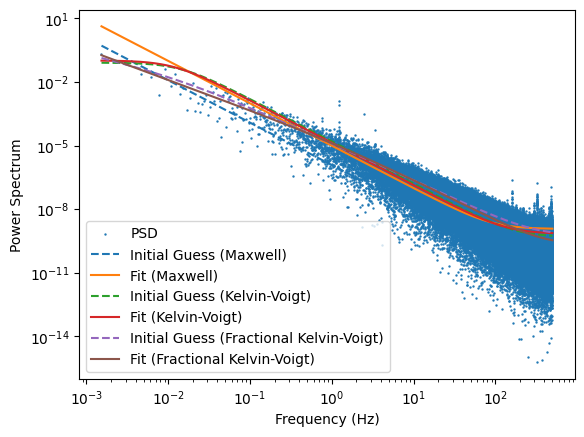

In [3]:
data.plot_psd()

In [4]:
surprise_maxwell = get_surprise(data.frequencies,data.PSD, lambda x, params: PSD(x,G_Maxwell ,params), data.fit_maxwell.x, log_weighted=True)
surprise_kelvin_voigt = get_surprise(data.frequencies,data.PSD, lambda x, params: PSD(x,G_Kelvin_Voigt ,params), data.fit_kelvin_voigt.x, log_weighted=True)
surprise_fractional_kelvin_voigt = get_surprise(data.frequencies,data.PSD, lambda x, params: PSD(x,G_fractional_Kelvin_Voigt ,params), data.fit_fractional_kelvin_voigt.x, log_weighted=True)



In [44]:
weights = 1.0 / np.arange(1, len(data.PSD) + 1)

In [46]:
np.sum(weights)


13.277009992172895

In [47]:
len(data.PSD)

327680

In [41]:
print(data.NLL_maxwell)
print(data.NLL_kelvin_voigt)
print(data.NLL_fractional_kelvin_voigt)

-125.12338157580434
-129.45579996689585
-133.141815805502


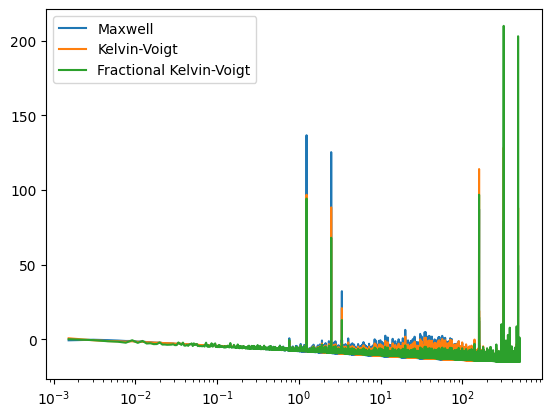

In [39]:
plt.plot(data.frequencies, surprise_maxwell, label="Maxwell")
plt.plot(data.frequencies, surprise_kelvin_voigt, label="Kelvin-Voigt")
plt.plot(data.frequencies, surprise_fractional_kelvin_voigt, label="Fractional Kelvin-Voigt")
plt.xscale("log")
plt.legend()
plt.show()


In [43]:
#print the sum of the surprises minus the minimum surprise
min_surprise = np.min([np.sum(surprise_maxwell), np.sum(surprise_kelvin_voigt), np.sum(surprise_fractional_kelvin_voigt)])
print(np.sum(surprise_maxwell) - min_surprise)
print(np.sum(surprise_kelvin_voigt) - min_surprise)
print(np.sum(surprise_fractional_kelvin_voigt) - min_surprise)

64410.19290050026
28029.932855433784
0.0


In [6]:
print(data.posterior_maxwell)
print(data.posterior_kelvin_voigt)
print(data.posterior_fractional_kelvin_voigt)

0.01181239533080668
0.2467932247428763
0.7413943799263171


In [9]:
data.peaks = []
data.max_peak_percentage = .9
data.find_peaks(max_iter=5)

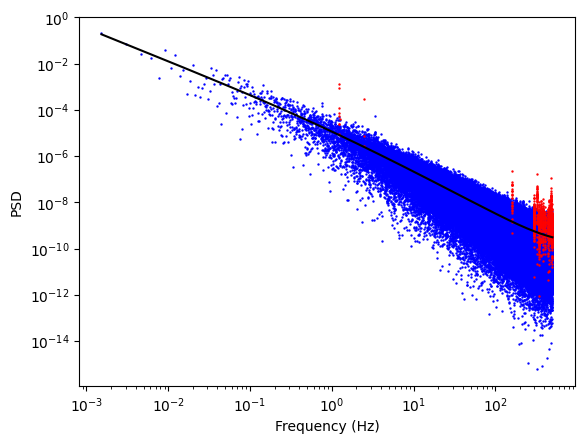

In [10]:
frequencies = data.frequencies
PSD = data.PSD
peak_idx = get_peak_indices(data.peaks)
non_peak_idx = np.setdiff1d(np.arange(len(frequencies)), peak_idx)
plt.scatter(frequencies[non_peak_idx], PSD[non_peak_idx], s=.5,c='b', label='Hydrogel 1 kHz')
plt.scatter(frequencies[peak_idx], PSD[peak_idx], s=.5,c='r')
plt.plot(frequencies, data.fit_function(frequencies, data.fit_params), c='k')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()


In [11]:
data.fit_params 


array([7.00371317e+04, 9.53498617e+04, 4.25788772e-01, 8.93339658e-01,
       1.52446568e-10])